In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df_I10= pd.read_csv('../../datasets/Join_Collection_NSC2_BND_M20.csv')
df_I10.columns

Index(['Unnamed: 0', 'EDC_SBA', 'OPRTN_YN', 'MDCARE_DD_CNT', 'BTH_YYYY',
       'MCARE_RSLT_TYPE', 'VSHSP_DD_CNT', 'EDC_ADD_RT'],
      dtype='object')

In [3]:
df_I10_h = df_I10[['EDC_SBA','OPRTN_YN','VSHSP_DD_CNT','BTH_YYYY']]
df_I10_h  #분석할 컬럼들만 추출

,EDC_SBA,OPRTN_YN,VSHSP_DD_CNT,BTH_YYYY
0,3000,0,1,1921LE
1,6000,0,2,1921LE
2,3000,0,1,1921LE
3,4200,0,1,1921LE
4,1500,0,1,1921LE
...,...,...,...,...
4200,3000,0,1,2005
4201,3000,0,1,2005
4202,3000,0,1,2005
4203,3000,0,1,2005


## 목표변수 검증

Y : 연속형 : 단일 변수에 대한 정규성 여부 판단

    - 검증 갯수 따른 방법 선택 (레코드 갯수)
        - 5천개보다 이하 : shapiro normality test
        - 5천개보다 이상 : Anderson normality test

선정 변수: EDC_SBA (심결본인부담금)
    
   - 분석 내용 : EDC_SBA (심결본인부담금 가 정규 분포를 따르는가?
        - 귀무가설 : EDC_SBA (심결본인부담금)가 정규 분포이다.
        - 대립가설 : EDC_SBA (심결본인부담금)가 정규 분포가 아니다.

    - 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
        - 통계 결론 : pvalue=0.0이므로 대립가설 참
        - 사실 결론 : 심결본인부담금 (EDC_SBA)가 정규 분포가 아니다.

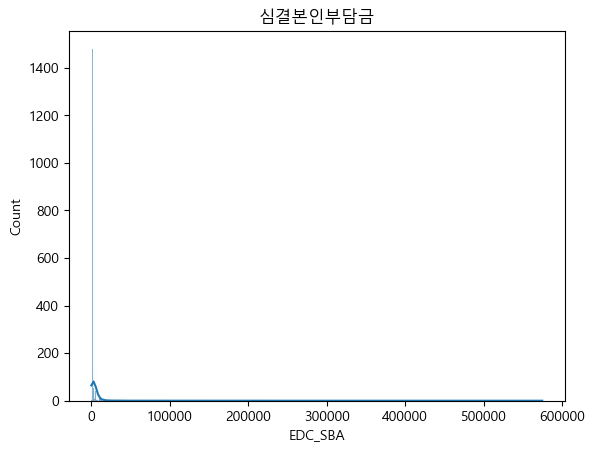

<Figure size 640x480 with 0 Axes>

In [33]:
sns.histplot(data=df_I10_h, x='EDC_SBA', kde=True)
plt.title("심결본인부담금")
plt.show()
plt.savefig("심결본인부담금.png")

In [8]:
df_I10_h['EDC_SBA'].count()

4205

In [9]:
stats.shapiro(df_I10_h['EDC_SBA'])

## pvalue=0.0 --> 0.05이하로 대립가설참

ShapiroResult(statistic=0.11326897144317627, pvalue=0.0)

## 설명변수 검증

- VSHSP_DD_CNT(공상 등 구분) - 연속형
- BTH_YYYY(출생년도) - 연속형 
- OPRTN_YN(수술여부) - 범주형 

### X:연속형 / Y:연속형 : 주로 상관관계 확인

- correlation coefficient(상관계수)
- -1 ~ 1
- 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례


In [21]:
df_I10_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 11 to 4204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EDC_SBA       4194 non-null   int64 
 1   OPRTN_YN      4194 non-null   object
 2   VSHSP_DD_CNT  4194 non-null   int64 
 3   BTH_YYYY      4194 non-null   int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 147.4+ KB


#### 선정 변수: 심결본인부담금, 공상 등 구분

    - 분석 내용 : 심결본인부담금에 따라서 공상 등 구분에 변화가 있는가?
        - 귀무가설 : 심결요양급여비용총액에 변화가 없다.
        - 대립가설 : 심결요양급여비용총액에 변화가 있다.
        
    - 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
        - 통계 결론 : 대립가설 참, 상관계수 비례관계
        - 사실 결론 : 심결본인부담금에 변화가 있다.
        - SignificanceResult(statistic=0.3698375474288705, pvalue=1.9098228360110356e-136)

#### X : 연속형 / Y : 연속형  = 주로 상관관계 확인에서 사용
    - correlation coefficient(상관계수)
    - 1 ~ 1
    - 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례

In [12]:
df_I10_h[['EDC_SBA','VSHSP_DD_CNT']].describe().corr()

,EDC_SBA,VSHSP_DD_CNT
EDC_SBA,1.000000,-0.136108
VSHSP_DD_CNT,-0.136108,1.000000


In [17]:
stats.spearmanr(df_I10_h['EDC_SBA'], df_I10_h['VSHSP_DD_CNT'])
##  statistic=0.369, pvalue=1.9098228360110356e-136) --> 0.05보다 작음 대립가설 참 

SignificanceResult(statistic=0.3698375474288705, pvalue=1.9098228360110356e-136)

#### 선정 변수: 심결본인부담금(EDC_SBA) , 생년월일(BTH_YYYY)

- 분석 내용 : 출생년도에 따라 요양개시일자에 관계가 있는가?
    - 귀무가설 : EDC_SBA(심결본인부담금),BTH_YYYY(출생년도)에 상관관계가 없다.
    - 대립가설 : EDC_SBA(심결본인부담금),BTH_YYYY(출생년도)에 상관관계가 있다.
    
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참
    - 사실 결론 : 심결본인부담금과 출생년도와 관계가 있다.
    - SignificanceResult(statistic=0.03672791508391399, pvalue=0.017230460044135053)

In [15]:
df_I10_h[['EDC_SBA','BTH_YYYY']].describe().corr()

,EDC_SBA
EDC_SBA,1.0


In [16]:
stats.spearmanr(df_I10_h['EDC_SBA'], df_I10_h['BTH_YYYY'])

SignificanceResult(statistic=0.03672791508391399, pvalue=0.017230460044135053)

### X : 범주형 / Y : 연속형 = 주로 상관관계 확인에서 사용

- record 갯수 5천개 이하 : shapiro test (정규성 검증)
- 정규분포 등분산 검증방법
    - p_value > 0.05 등분산
    - p_value < 0.05 이분산

#### 선정 변수: EDC_SBA(심결본인부담금) ,OPRTN_YN(수술여부) Wilcoxon Test

- 분석 내용 : 본인부담금이 수술여부와 차이가 있나?
    - 귀무가설 : 본인부담금이 수술여부와 차이가 없다.
    - 대립가설 : 본인부담금이 수술여부와 차이가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참
    - 사실 결론 : 수술여부에 따라서 본인부담금이 차이가 있다. 
    - RanksumsResult(statistic=-2.998573127148773, pvalue=0.0027124705352598944)

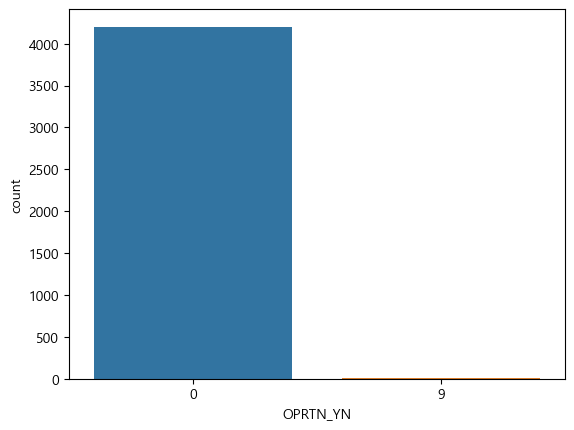

In [34]:
sns.countplot(data=df_I10_h, x='OPRTN_YN')
plt.savefig("수술여부.png")

In [21]:
df_I10_h['OPRTN_YN'].value_counts()

0    4202
9       3
Name: OPRTN_YN, dtype: int64

In [24]:
df_OPR = df_I10_h[['EDC_SBA','OPRTN_YN']]

In [25]:
df_OPR_O = df_OPR[df_OPR['OPRTN_YN'] == 0]
df_OPR_O[:2]

,EDC_SBA,OPRTN_YN
0,3000,0
1,6000,0


In [27]:
df_OPR_N = df_OPR[df_OPR['OPRTN_YN'] == 9]
df_OPR_N[:2]

,EDC_SBA,OPRTN_YN
3961,94100,9
4155,1500,9


In [28]:
stats.ranksums(df_OPR_O['OPRTN_YN'], df_OPR_N['OPRTN_YN'])

## statistic=0.0, pvalue=1.0 -> 0.05보다 큼, 귀무가설 참 

RanksumsResult(statistic=-2.998573127148773, pvalue=0.0027124705352598944)